In [4]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 23.0 MB/s eta 0:00:00


In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [30]:
dlev=ctrl.Antecedent(np.arange(0,100.1,0.1),'Demand Level')
compri=ctrl.Antecedent(np.arange(0,100.1,0.1),'Competitor Pricing')
procos=ctrl.Antecedent(np.arange(0,100.1,0.1),'Production Cost')
season=ctrl.Antecedent(np.arange(0,100.1,0.1),'Seasonality')
slev=ctrl.Antecedent(np.arange(0,100.1,0.1),'Stock Level')

finalprice=ctrl.Consequent(np.arange(0,100.1,0.1),'Final Price')

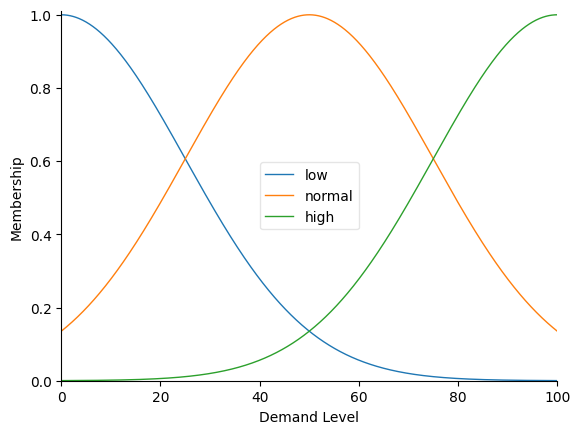

In [31]:
dlev['low']=fuzz.gaussmf(dlev.universe,0,25)
dlev['normal']=fuzz.gaussmf(dlev.universe,50,25)
dlev['high']=fuzz.gaussmf(dlev.universe,100,25)
dlev.view()

In [32]:
compri['low']=fuzz.gaussmf(compri.universe,0,25)
compri['normal']=fuzz.gaussmf(compri.universe,50,25)
compri['high']=fuzz.gaussmf(compri.universe,100,25)

In [33]:
procos['low']=fuzz.gaussmf(procos.universe,0,25)
procos['normal']=fuzz.gaussmf(procos.universe,50,25)
procos['high']=fuzz.gaussmf(procos.universe,100,25)

In [34]:
season['off-peak']=fuzz.gaussmf(season.universe,0,25)
season['normal']=fuzz.gaussmf(season.universe,50,25)
season['peak']=fuzz.gaussmf(season.universe,100,25)

In [35]:
slev['low']=fuzz.gaussmf(slev.universe,0,25)
slev['normal']=fuzz.gaussmf(slev.universe,50,25)
slev['high']=fuzz.gaussmf(slev.universe,100,25)

In [37]:
finalprice['very low']=fuzz.gaussmf(finalprice.universe,0,20)
finalprice['low']=fuzz.gaussmf(finalprice.universe,33,20)
finalprice['high']=fuzz.gaussmf(finalprice.universe,66,20)
finalprice['very high']=fuzz.gaussmf(finalprice.universe,100,20)

In [38]:
rule1=ctrl.Rule(dlev['high']&compri['high']&slev['low'],finalprice['very high'])
rule2=ctrl.Rule(dlev['high']&season['peak']&slev['low'],finalprice['very high'])
rule3=ctrl.Rule(dlev['normal']&procos['high']&slev['low'],finalprice['very high'])

In [39]:
rule4=ctrl.Rule(dlev['high']&compri['normal']&slev['normal'],finalprice['high'])
rule5=ctrl.Rule(dlev['normal']&compri['high']&slev['low'],finalprice['high'])
rule6=ctrl.Rule(dlev['normal']&compri['high']&slev['low'],finalprice['high'])
rule7=ctrl.Rule(dlev['high']&season['peak']&slev['normal'],finalprice['high'])

In [40]:
rule8=ctrl.Rule(dlev['low']&compri['normal']&slev['high'],finalprice['low'])
rule9=ctrl.Rule(dlev['normal']&procos['low']&slev['high'],finalprice['low'])
rule10=ctrl.Rule(dlev['low']&season['off-peak']&slev['high'],finalprice['low'])

In [41]:
rule11=ctrl.Rule(dlev['low']&compri['low']&slev['high'],finalprice['very low'])
rule12=ctrl.Rule(dlev['low']&season['off-peak']&slev['high'],finalprice['very low'])
rule13=ctrl.Rule(dlev['normal']&compri['low']&slev['high'],finalprice['very low'])
rule14=ctrl.Rule(dlev['normal']&compri['low']&slev['high'],finalprice['very low'])

49.99999999999973


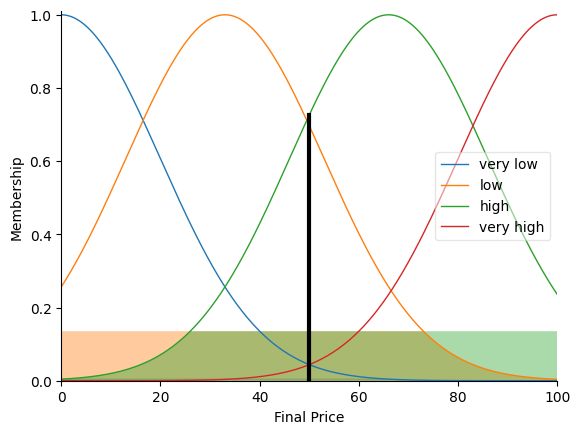

In [43]:
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Demand Level']=100
tipping.input['Competitor Pricing']=80
tipping.input['Production Cost']=40
tipping.input['Seasonality']=30
tipping.input['Stock Level']=100
tipping.compute()
print(tipping.output['Final Price'])
finalprice.view(sim=tipping)